In [38]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [39]:
df = pd.read_csv("Documents/data/bank-additional-full.csv")

In [40]:
df.head()

,"age;""job"";""marital"";""education"";""default"";""housing"";""loan"";""contact"";""month"";""day_of_week"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""emp.var.rate"";""cons.price.idx"";""cons.conf.idx"";""euribor3m"";""nr.employed"";""y"""
0,"56;""housemaid"";""married"";""basic.4y"";""no"";""no"";..."
1,"57;""services"";""married"";""high.school"";""unknown..."
2,"37;""services"";""married"";""high.school"";""no"";""ye..."
3,"40;""admin."";""married"";""basic.6y"";""no"";""no"";""no..."
4,"56;""services"";""married"";""high.school"";""no"";""no..."


In [41]:
df = pd.read_csv("Documents/data/bank-additional-full.csv",delimiter=";")

In [42]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [43]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

Explanation of technical column names:

default: Has the customer ever defaulted on a bank loan(yes for positive, no for negative)
housing: Has the customer taken a housing loan e.g mortgage(yes for positive, no for negative)
campaign: Number of times a customer has been contacted for this campaign
pdays: the number of days since the customer was last contacted from a previous campaign
previous: How many times has the customer tried to participate in a fixed deposit
poutcome: What is the status of success(success, failure or non-existent)
emp.var.rate: Macroeconomic feature meaning employment rates at the time of campaign
cons.price.ix : Macroeconomic feature meaning the rate of spend of consumers at the time of campaign
cons.conf.idx: Macroeconomic feature meaning confidence of clientson the health of economy at the time of campaign
euribor3m: Macroeconomic feature used to indicate european bank interest rate which determines the likelihood of clients investing in fixed deposits
nr.employed: Number of employed at the time of campaign

Exploratory Analysis

In [44]:
display(df['age'].value_counts())
display(df['job'].value_counts())
display(df['marital'].value_counts())
display(df['education'].value_counts())
display(df['housing'].value_counts())
display(df['loan'].value_counts())
display(df['contact'].value_counts())
display(df['month'].value_counts())
display(df['day_of_week'].value_counts())
display(df['duration'].value_counts())
display(df['campaign'].value_counts())
display(df['pdays'].value_counts())
display(df['previous'].value_counts())
display(df['poutcome'].value_counts())
display(df['emp.var.rate'].value_counts())
display(df['cons.price.idx'].value_counts())
display(df['cons.conf.idx'].value_counts())
display(df['euribor3m'].value_counts())
display(df['nr.employed'].value_counts())
display(df['y'].value_counts())





31    1947
32    1846
33    1833
36    1780
35    1759
      ... 
89       2
91       2
94       1
87       1
95       1
Name: age, Length: 78, dtype: int64

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

cellular     26144
telephone    15044
Name: contact, dtype: int64

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64

thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64

90      170
85      170
136     168
73      167
124     164
       ... 
1569      1
1053      1
1263      1
1169      1
1868      1
Name: duration, Length: 1544, dtype: int64

1     17642
2     10570
3      5341
4      2651
5      1599
6       979
7       629
8       400
9       283
10      225
11      177
12      125
13       92
14       69
17       58
16       51
15       51
18       33
20       30
19       26
21       24
22       17
23       16
24       15
27       11
29       10
28        8
26        8
25        8
31        7
30        7
35        5
32        4
33        4
34        3
42        2
40        2
43        2
56        1
39        1
41        1
37        1
Name: campaign, dtype: int64

999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
22         3
19         3
21         2
25         1
26         1
27         1
20         1
Name: pdays, dtype: int64

0    35563
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: previous, dtype: int64

nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64

 1.4    16234
-1.8     9184
 1.1     7763
-0.1     3683
-2.9     1663
-3.4     1071
-1.7      773
-1.1      635
-3.0      172
-0.2       10
Name: emp.var.rate, dtype: int64

93.994    7763
93.918    6685
92.893    5794
93.444    5175
94.465    4374
93.200    3616
93.075    2458
92.201     770
92.963     715
92.431     447
92.649     357
94.215     311
94.199     303
92.843     282
92.379     267
93.369     264
94.027     233
94.055     229
93.876     212
94.601     204
92.469     178
93.749     174
92.713     172
94.767     128
93.798      67
92.756      10
Name: cons.price.idx, dtype: int64

-36.4    7763
-42.7    6685
-46.2    5794
-36.1    5175
-41.8    4374
-42.0    3616
-47.1    2458
-31.4     770
-40.8     715
-26.9     447
-30.1     357
-40.3     311
-37.5     303
-50.0     282
-29.8     267
-34.8     264
-38.3     233
-39.8     229
-40.0     212
-49.5     204
-33.6     178
-34.6     174
-33.0     172
-50.8     128
-40.4      67
-45.9      10
Name: cons.conf.idx, dtype: int64

4.857    2868
4.962    2613
4.963    2487
4.961    1902
4.856    1210
         ... 
3.853       1
3.901       1
0.969       1
0.956       1
3.669       1
Name: euribor3m, Length: 316, dtype: int64

5228.1    16234
5099.1     8534
5191.0     7763
5195.8     3683
5076.2     1663
5017.5     1071
4991.6      773
5008.7      650
4963.6      635
5023.5      172
5176.3       10
Name: nr.employed, dtype: int64

no     36548
yes     4640
Name: y, dtype: int64

In [45]:
df[df.isnull().any(axis=1)]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y


In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='y', ylabel='count'>

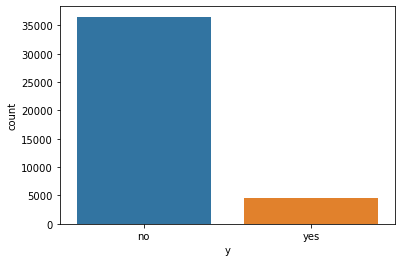

In [47]:
df['y'].value_counts(normalize=True)
sns.countplot(x='y', data=df)

<Axes: xlabel='age', ylabel='Count'>

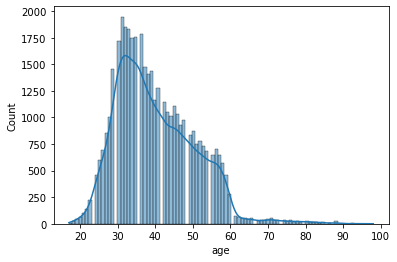

In [48]:
sns.histplot(df['age'], kde=True)


<Axes: xlabel='age'>

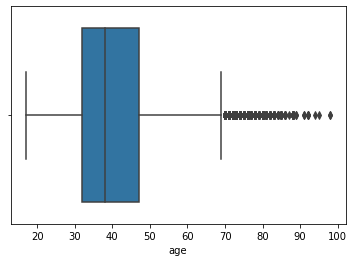

In [49]:
sns.boxplot(x='age', data=df)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'housemaid'),
  Text(1, 0, 'services'),
  Text(2, 0, 'admin.'),
  Text(3, 0, 'blue-collar'),
  Text(4, 0, 'technician'),
  Text(5, 0, 'retired'),
  Text(6, 0, 'management'),
  Text(7, 0, 'unemployed'),
  Text(8, 0, 'self-employed'),
  Text(9, 0, 'unknown'),
  Text(10, 0, 'entrepreneur'),
  Text(11, 0, 'student')])

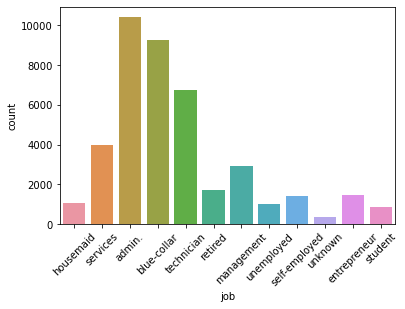

In [50]:
sns.countplot(x='job', data=df)
plt.xticks(rotation=45)

<Axes: xlabel='job'>

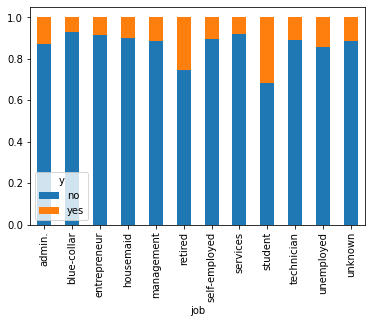

In [51]:
pd.crosstab(df['job'], df['y'], normalize='index').plot(kind='bar', stacked=True)



In [53]:
yes_jobs = df[df['y'] == 'yes']

# Count how many "yes" responses per job
job_yes_counts = yes_jobs['job'].value_counts()
age_yes_counts = yes_jobs['age'].value_counts()
education_yes_counts = yes_jobs['education'].value_counts()


# Display the job with the highest count
top_job = job_yes_counts.idxmax()
top_count = job_yes_counts.max()
top_age = age_yes_counts.idxmax()
top_education = education_yes_counts.idxmax()



print(f"The job category with the highest number of 'yes' responses is: '{job_yes_counts}' with {top_count} subscriptions.")
print(f"The age category with the highest number of 'yes' responses is: '{age_yes_counts}' with {top_age} subscriptions.")
print(f"The education level category with the highest number of 'yes' responses is: '{education_yes_counts}' with {top_education} subscriptions.")


The job category with the highest number of 'yes' responses is: 'admin.           1352
technician        730
blue-collar       638
retired           434
management        328
services          323
student           275
self-employed     149
unemployed        144
entrepreneur      124
housemaid         106
unknown            37
Name: job, dtype: int64' with 1352 subscriptions.
The age category with the highest number of 'yes' responses is: '31    220
33    210
30    202
29    186
34    184
     ... 
92      3
17      2
98      2
89      2
87      1
Name: age, Length: 75, dtype: int64' with 31 subscriptions.
The education level category with the highest number of 'yes' responses is: 'university.degree      1670
high.school            1031
professional.course     595
basic.9y                473
basic.4y                428
unknown                 251
basic.6y                188
illiterate                4
Name: education, dtype: int64' with university.degree subscriptions.


In [54]:

df['y'] = df['y'].map({'yes': 1, 'no': 0})





In [55]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


Seems this dataset is well sanitized with no missing values

In [56]:
correlation_matrix = df.corr(numeric_only=True)
print(correlation_matrix)






                     age  duration  campaign     pdays  previous  \
age             1.000000 -0.000866  0.004594 -0.034369  0.024365   
duration       -0.000866  1.000000 -0.071699 -0.047577  0.020640   
campaign        0.004594 -0.071699  1.000000  0.052584 -0.079141   
pdays          -0.034369 -0.047577  0.052584  1.000000 -0.587514   
previous        0.024365  0.020640 -0.079141 -0.587514  1.000000   
emp.var.rate   -0.000371 -0.027968  0.150754  0.271004 -0.420489   
cons.price.idx  0.000857  0.005312  0.127836  0.078889 -0.203130   
cons.conf.idx   0.129372 -0.008173 -0.013733 -0.091342 -0.050936   
euribor3m       0.010767 -0.032897  0.135133  0.296899 -0.454494   
nr.employed    -0.017725 -0.044703  0.144095  0.372605 -0.501333   
y               0.030399  0.405274 -0.066357 -0.324914  0.230181   

                emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
age                -0.000371        0.000857       0.129372   0.010767   
duration           -0.027968       

In [57]:
feature_vs_y = correlation_matrix[['y']].drop('y')



In [58]:
print(feature_vs_y)

                       y
age             0.030399
duration        0.405274
campaign       -0.066357
pdays          -0.324914
previous        0.230181
emp.var.rate   -0.298334
cons.price.idx -0.136211
cons.conf.idx   0.054878
euribor3m      -0.307771
nr.employed    -0.354678


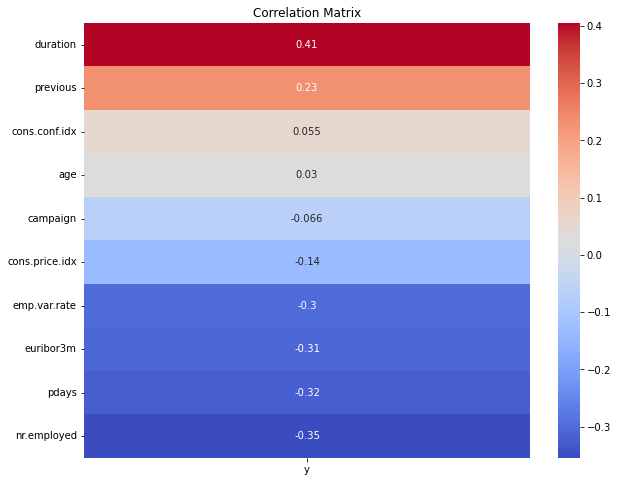

In [59]:
plt.figure(figsize=(10, 8))
sns.heatmap(feature_vs_y.sort_values(by='y', ascending=False), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()



Correlation between non-numeric variables and "y"



In [60]:
df_encoded = pd.get_dummies(df,drop_first=True)

In [61]:
from scipy.stats import pointbiserialr



In [62]:
pb_corr = {}

for col in df_encoded.columns:
    r, _ = pointbiserialr(df['y'], df_encoded[col])
    print(f"{col}: r = {r:.2f}")
    pb_corr[col] = r


age: r = 0.03
duration: r = 0.41
campaign: r = -0.07
pdays: r = -0.32
previous: r = 0.23
emp.var.rate: r = -0.30
cons.price.idx: r = -0.14
cons.conf.idx: r = 0.05
euribor3m: r = -0.31
nr.employed: r = -0.35
y: r = 1.00
job_blue-collar: r = -0.07
job_entrepreneur: r = -0.02
job_housemaid: r = -0.01
job_management: r = -0.00
job_retired: r = 0.09
job_self-employed: r = -0.00
job_services: r = -0.03
job_student: r = 0.09
job_technician: r = -0.01
job_unemployed: r = 0.01
job_unknown: r = -0.00
marital_married: r = -0.04
marital_single: r = 0.05
marital_unknown: r = 0.01
education_basic.6y: r = -0.02
education_basic.9y: r = -0.05
education_high.school: r = -0.01
education_illiterate: r = 0.01
education_professional.course: r = 0.00
education_university.degree: r = 0.05
education_unknown: r = 0.02
default_unknown: r = -0.10
default_yes: r = -0.00
housing_unknown: r = -0.00
housing_yes: r = 0.01
loan_unknown: r = -0.00
loan_yes: r = -0.00
contact_telephone: r = -0.14
month_aug: r = -0.01
mon

In [63]:
pb_corr_df = pd.DataFrame(pb_corr.items(), columns=['Feature', 'Correlation'])
pb_corr_df.set_index('Feature', inplace=True)

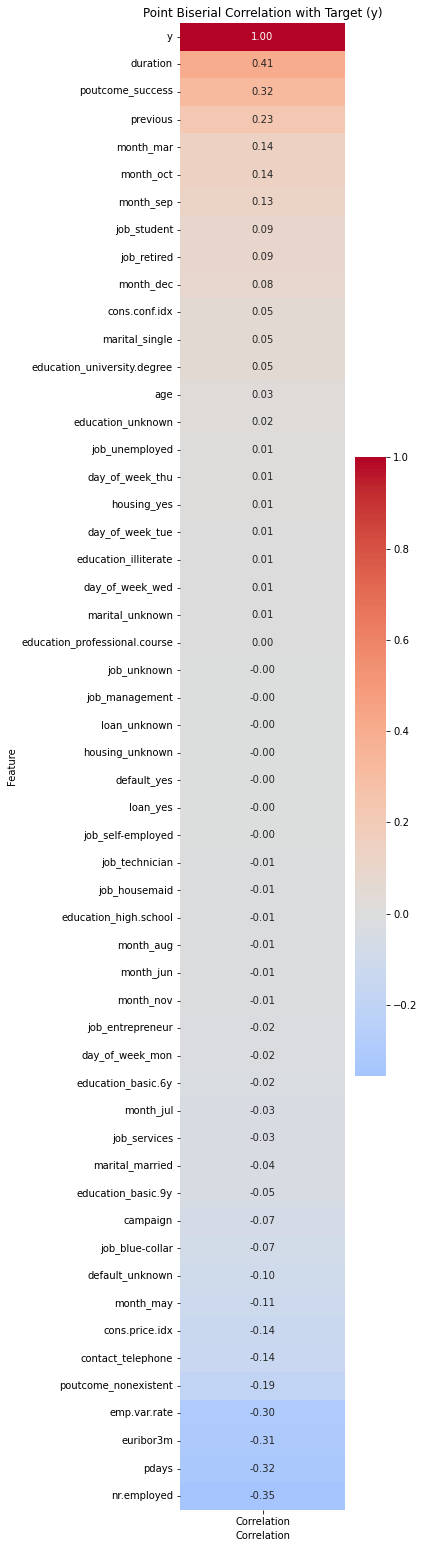

In [64]:
plt.figure(figsize=(6, len(pb_corr_df) * 0.4))
sns.heatmap(pb_corr_df.sort_values(by='Correlation', ascending=False),
            annot=True, cmap='coolwarm', center=0, fmt=".2f")

plt.title("Point Biserial Correlation with Target (y)")
plt.xlabel("Correlation")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [65]:
X = df_encoded.drop('y', axis=1)
y = df_encoded['y']

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


Comparing results of logistic regression over Random Forest

In [67]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [69]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_scaled, y_train)
y_pred_log = log_model.predict(X_test_scaled)


Random Forest Prediction

In [70]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)  # No scaling needed
y_pred_rf = rf_model.predict(X_test)

In [71]:
importances = pd.Series(rf_model.feature_importances_, index=X.columns)
importances_sorted = importances.sort_values()

# See features with lowest importance
print(importances_sorted)

print(" Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

# Random Forest Results
print("\n Random Forest:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))



default_yes                      2.836198e-08
education_illiterate             2.662272e-04
marital_unknown                  3.788027e-04
month_dec                        6.807297e-04
job_unknown                      1.541606e-03
month_nov                        2.147560e-03
housing_unknown                  2.273936e-03
month_sep                        2.276754e-03
loan_unknown                     2.490076e-03
month_jul                        2.786620e-03
month_aug                        2.859812e-03
month_jun                        3.004730e-03
job_housemaid                    3.371469e-03
job_entrepreneur                 4.050580e-03
job_unemployed                   4.312461e-03
month_may                        4.410317e-03
month_mar                        4.457080e-03
job_student                      4.481633e-03
job_self-employed                4.617967e-03
education_basic.6y               4.621886e-03
education_unknown                5.124498e-03
job_retired                      5

In [72]:
import pickle

pickle.dump(log_model, open("log_model.pkl", "wb"))
pickle.dump(scaler, open("scaler.pkl", "wb"))

In [73]:
tf=pd.read_csv('Documents/data/bank-additional.csv',delimiter=';')

In [74]:
tf.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [75]:
tf['y'] = tf['y'].map({'yes': 1, 'no': 0})


In [76]:
tf.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,0
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,0
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,0


In [77]:
tf_encoded = pd.get_dummies(tf,drop_first=True)
A = tf_encoded.drop('y', axis=1)
b = tf_encoded['y']

In [78]:
log_model = pickle.load(open("log_model.pkl", "rb"))
scaler = pickle.load(open("scaler.pkl", "rb"))


new_scaled = scaler.transform(A)
prediction = log_model.predict(new_scaled)

In [79]:
print(prediction)

[0 0 0 ... 0 0 0]


In [80]:
print(" Logistic Regression:")
print("Accuracy:", accuracy_score(b, prediction))
print(classification_report(b, prediction))

 Logistic Regression:
Accuracy: 0.9150279193979121
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      3668
           1       0.68      0.43      0.52       451

    accuracy                           0.92      4119
   macro avg       0.80      0.70      0.74      4119
weighted avg       0.90      0.92      0.91      4119

